In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

#### Get the columns of measurement class

In [9]:
measurement.__table__.columns.values()


[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

#### Get the columns of station class

In [10]:
station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
from dateutil.relativedelta import relativedelta
maxDate = session.query(func.max(measurement.date).label('MaxDate')).first() 

minDate = dt.datetime.strptime(maxDate[0], '%Y-%m-%d').date() - relativedelta(years=1)
print (minDate)
# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date > minDate)
# Save the query results as a Pandas DataFrame and set the index to the date column
percipitationScores = pd.read_sql(query.statement, engine)

# Sort the dataframe by date
percipitationScores.sort_values(by='date', ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data


2016-08-23


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [16]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
myTripTemps = calc_temps('2017-06-01', '2017-06-01')

print (myTripTemps)

[(74.0, 78.16666666666667, 81.0)]


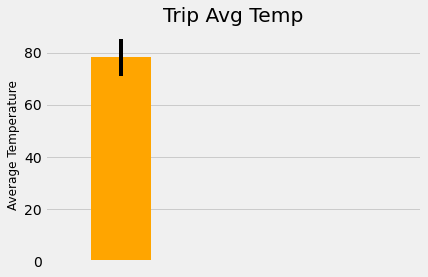

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
avgTemp = myTripTemps[0][1]
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
pkTopkTemp = myTripTemps[0][2] - myTripTemps[0][0]

# plot the graph - https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars.
plt.bar(1, avgTemp, yerr = pkTopkTemp, color = 'orange',align='center')
plt.ylabel("Average Temperature", fontsize="12")
plt.title("Trip Avg Temp")

# set the tick values
xticks = [avgTemp]
xtickLabels  = [""]
plt.xticks(xticks, xtickLabels)

# set the xlimit as 0 -5 
plt.xlim(0,5)
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [41]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [81]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`
minTobsList = []
avgTobsList = []
maxTobsList = []
dateList =[]
dateStrList=[]
# Set the start and end date of the trip

startDate = dt.date(2018,6,1)
endDate = dt.date(2018,6,7)
date = startDate

# Use the start and end date to create a range of dates
dateList = pd.date_range(start= startDate, end=endDate, freq='D')

# Stip off the year and save a list of %m-%d strings
for dT in dateList:
    dateStrList.append(dT.strftime('%m-%d'))

# Loop through the list of %m-%d strings and calculate the normals for each date

for dtStr in dateStrList :
    tobs = daily_normals(dtStr)
    minTobsList.append(tobs[0][0])
    avgTobsList.append(tobs[0][1])
    maxTobsList.append(tobs[0][2])



In [84]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# reference : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html

tobsDF = pd.DataFrame({'tMin' : minTobsList,
                      'tAvg' : avgTobsList,
                       'tMax' : maxTobsList}, index=dateList )

tobsDF.head()

,tMin,tAvg,tMax
2018-06-01,64.0,74.614035,81.0
2018-06-02,65.0,74.400000,81.0
2018-06-03,65.0,74.034483,80.0
2018-06-04,65.0,73.818182,81.0
2018-06-05,68.0,74.854545,81.0


Text(0.5, 0, 'Dates')

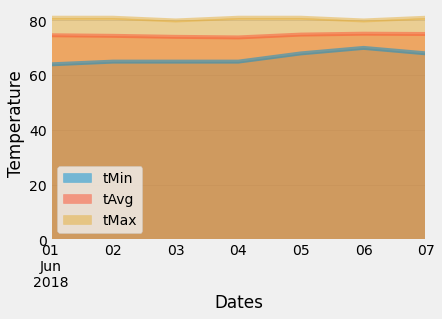

In [88]:
# Plot the daily normals as an area plot with `stacked=False`
ax = tobsDF.plot.area(stacked=False)
ax.set_ylabel('Temperature')
ax.set_xlabel('Dates')